In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq
    
    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        
        qpsk_map = {
            (0, 0): 1 + 1j,
            (0, 1): -1 + 1j,
            (1, 1): -1 - 1j,
            (1, 0): 1 - 1j
        }
        
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        
        return self.modulate(symbols), symbols, bits

    def generate_16qam(self):
        bits = np.random.randint(0, 2, 4 * self.num_symbols)
        
        qam16_map = {
            (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
            (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
            (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
            (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1):  1 + 1j
        }
        
        symbols = np.array([qam16_map[tuple(bits[i:i+4])] for i in range(0, len(bits), 4)])
        
        symbols /= np.sqrt(10) 
        
        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        
        signal = np.real(upsampled * carrier)
        
        return t, signal

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()
    
    def plot_constellation(self, symbols, modulation_type):
        plt.figure(figsize=(6, 6))
        plt.scatter(symbols.real, symbols.imag, c='r')
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

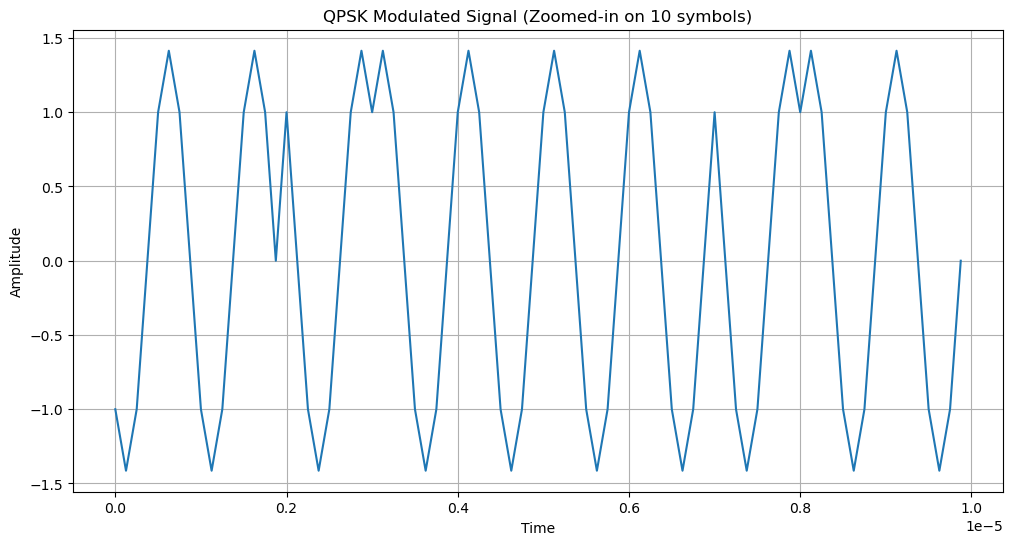

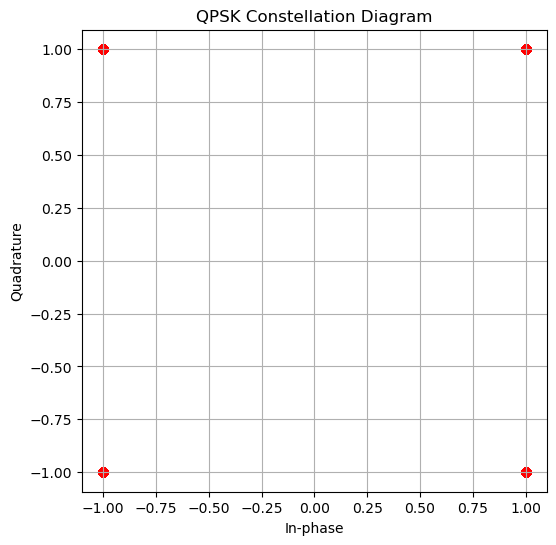

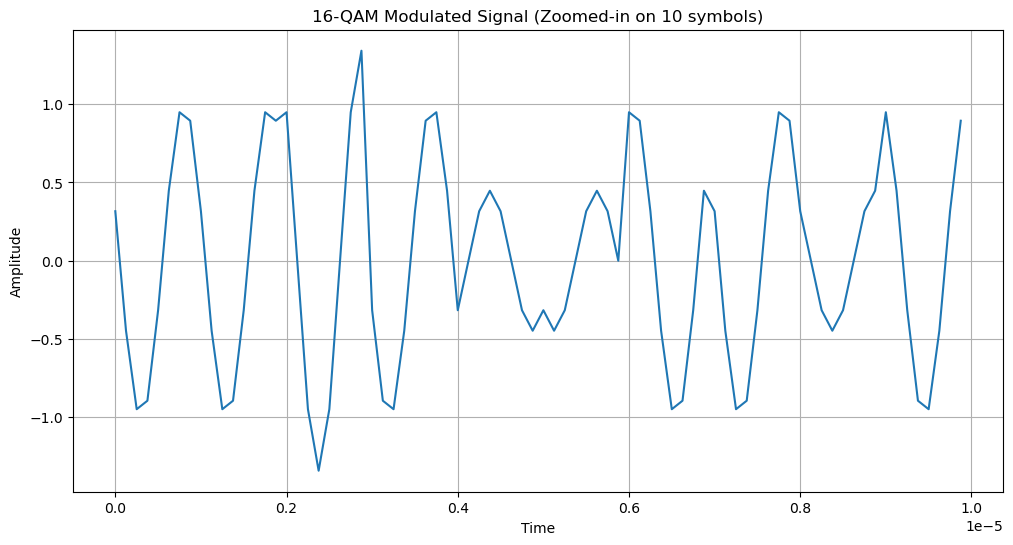

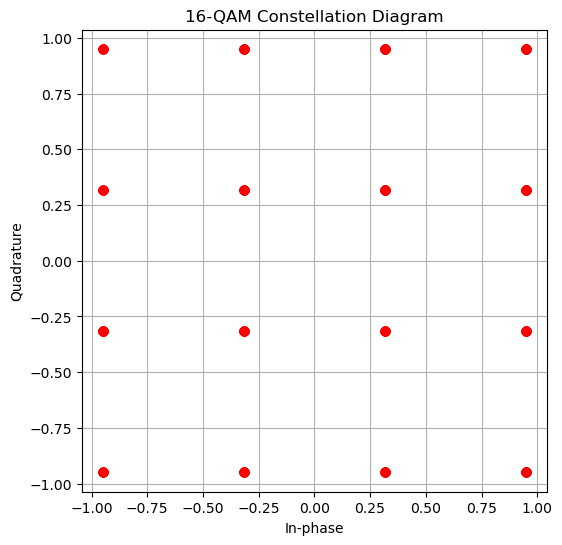

QPSK - First 10 bit pairs: [[0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]]
QPSK - First 10 symbols: [-1.+1.j -1.+1.j  1.+1.j  1.-1.j  1.-1.j  1.-1.j  1.-1.j  1.+1.j  1.-1.j
  1.-1.j]

16-QAM - First 10 bit quads: [[1 1 1 0]
 [1 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 1]
 [1 0 0 1]
 [1 1 1 0]
 [1 1 1 1]
 [1 0 1 1]]
16-QAM - First 10 symbols: [ 0.31622777+0.9486833j   0.31622777+0.9486833j   0.9486833 +0.9486833j
 -0.31622777+0.9486833j  -0.31622777-0.31622777j -0.31622777+0.31622777j
  0.9486833 -0.31622777j  0.31622777+0.9486833j   0.31622777+0.31622777j
  0.9486833 +0.31622777j]


In [17]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)


(t_qpsk, signal_qpsk), symbols_qpsk, bits_qpsk = dvbs2x.generate_qpsk()
dvbs2x.plot_signal(t_qpsk, signal_qpsk, "QPSK")
dvbs2x.plot_constellation(symbols_qpsk, "QPSK")

(t_16qam, signal_16qam), symbols_16qam, bits_16qam = dvbs2x.generate_16qam()
dvbs2x.plot_signal(t_16qam, signal_16qam, "16-QAM")
dvbs2x.plot_constellation(symbols_16qam, "16-QAM")

print("QPSK - First 10 bit pairs:", bits_qpsk[:20].reshape(-1, 2))
print("QPSK - First 10 symbols:", symbols_qpsk[:10])
print("\n16-QAM - First 10 bit quads:", bits_16qam[:40].reshape(-1, 4))
print("16-QAM - First 10 symbols:", symbols_16qam[:10])
